In [61]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time as time
from kohonen import *
from helpers import *
%load_ext autoreload
%autoreload 2
    
# load in data and labels    
data_pure = np.array(np.loadtxt('data/data.txt'))
labels_pure = np.loadtxt('data/labels.txt')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[ 9.  7.  5.  7.  0.  0.  0.  0.  5.  7.  5.  5.  5.  7.  7.  9.  5.  0.
  9.]
[ 9.  7.  5.  7.  0.  0.  0.  0.  5.  7.  5.  5.  5.  7.  7.  9.  5.  0.
  9.]


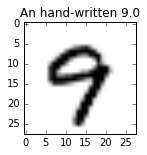

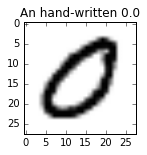

In [63]:
i = 48
data_matrix = rewritedata(data_pure)
visualize(data_matrix[i,:,:],labels_pure[i])

data_matrix = rewritedata(data)
visualize(data_matrix[i,:,:],labels[i])

In [132]:
#useful data
dim = 28*28
data_range = 255.0
    
# load in data and labels    
#data = np.array(np.loadtxt('data/data.txt'))
#labels = np.loadtxt('data/labels.txt')

# select 4 digits    
name = 'Andre Cibils' # REPLACE BY YOUR OWN NAME
targetdigits = name2digits(name) # assign the four digits that should be used
print(targetdigits) # output the digits that were selected
# this selects all data vectors that corresponds to one of the four digits
data = data_pure[np.logical_or.reduce([labels_pure==x for x in targetdigits]),:]
labels = labels_pure[np.logical_or.reduce([labels_pure==x for x in targetdigits])]
    
dy, dx = data.shape
    
#set the size of the Kohonen map. In this case it will be 6 X 6
size_k = 6
    
#set the width of the neighborhood via the width of the gaussian that
#describes it
sigma = 3

#set the learning rate
eta = 0.2 # HERE YOU HAVE TO SET YOUR OWN LEARNING RATE
    
#set the maximal iteration count
tmax = 2000 # this might or might not work; use your own convergence criterion

[0 5 7 9]


C:\Users\andre\Documents\EPFL\Boulot\NN\miniproject_1\src\kohonen.py:140: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Data = scipy.io.matlab.loadmat('hash.mat',struct_as_record=True)


In [4]:
#return eucl distance between the data and a center
def distance(vec1,vec2):
    assert np.shape(vec1)==np.shape(vec2)
    #print("   Distance between",vec1,"and",vec2)
    term1 = np.power(vec1-vec2,2)
    #print("      term1 :",term1)
    term2 = np.sqrt(np.sum(term1,axis=1))
    #print("      term2 :",term2)
    return term2

def assign_cluster(centers, datas):
    #initialization
    cluster_assignment = np.zeros(np.shape(datas)[0]) - 1
    current_c = np.tile(centers[0], (np.shape(datas)[0],1))
    eucl_distance = distance(current_c,datas)
    min_distance = np.copy(eucl_distance)
    #find cluster for each entry in datas
    for i in range(0,np.shape(centers)[0]):
        #print("Center is : ",centers[i], "iteration : ",i)
        current_c = np.tile(centers[i], (np.shape(datas)[0],1))
        eucl_distance = distance(current_c,datas)
        #print("   MD :",min_distance)
        #print("   ED :",eucl_distance)
        bool_distance = eucl_distance <= min_distance
        #print("   BD :",bool_distance)
        min_distance = eucl_distance*(bool_distance) + min_distance*(1 - bool_distance)
        #print("   MD :",min_distance)        
        cluster_assignment = cluster_assignment*(1 - bool_distance) + i*bool_distance
        #print("   CA :",cluster_assignment)
    return cluster_assignment

def reconstruction_error(centers,datas):
    #E = SUM{k}(SUM{u in C_k}((Wk - Xu)^2) by the course
    #E is mean error of quantization
    #Show that error decrease to prove convergence
    #Th. After conv, each proto is at the center of his data cloud
    E = 0
    cluster_assignment = assign_cluster(centers,datas)
    #print("Assignement is :",cluster_assignment)
    for i in range(0, np.shape(centers)[0]):
        #print("Center is : ",centers[i], "iteration : ",i)
        C_k = cluster_assignment == i #bool_tab to see if Xu is in C_k
        #print("   C_k :",C_k)
        current_c = np.tile(centers[i], (np.shape(datas)[0],1))
        C_ks = np.tile(C_k,(np.shape(datas)[1],1)).T
        values = datas * C_ks + current_c * (1 - C_ks) #if Xu is in C_k, Xu = data, else Xu = centers so Wk-Xu = 0
        #print("   values :",values)
        #print("   curren_c :",current_c)
        d = distance(current_c,values) #compute SUM{u in C_k}((Wk - Xu)^2) and add it to current E
        #print("   d :",d)
        E = E + sum(d)
        #print("   E :",E)
    return E

[0 1 2 3]


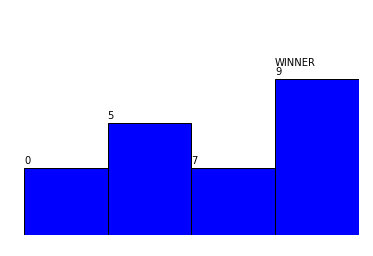

In [124]:
#Test cell
la = [3,5,3,7]
a = np.arange(4)
plt.figure(0)
print(a)
plb.axis([0,4,0,max(lab)+1])
plb.axis('off')
plt.bar(a,lab,1.0)
for i in range(0,4):
    plt.annotate(targetdigits[i],xy=(i,lab[i]+0.2))
    if(targetdigits[i]==max(targetdigits)):
        plt.annotate("WINNER",xy=(i,la[i]+0.6))


Iteration number is 0 . Learning rate for this iteration is : 0.2


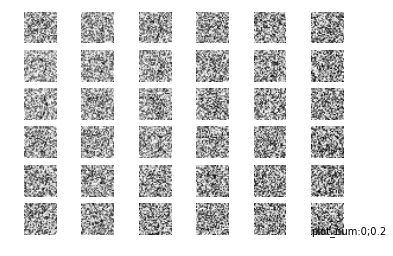

Iteration number is 1 . Learning rate for this iteration is : 0.5


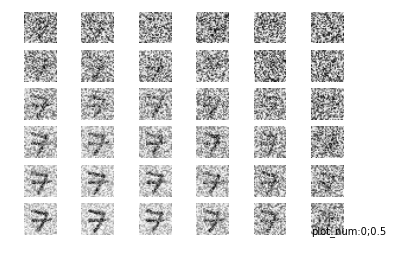

Iteration number is 2 . Learning rate for this iteration is : 0.8


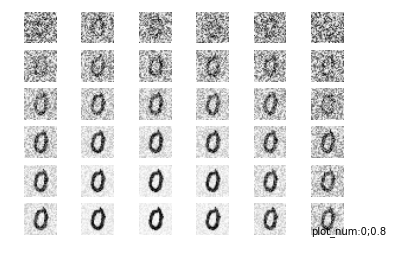

3


In [7]:
def kohonen(data,labels,learning_rates):
    """Example for using create_data, plot_data and som_step.
    """
    plb.close('all')
    
    losses = []
    for a in range(0,np.shape(learning_rates)[0]):    
        #initialise the centers randomly
        centers = np.random.rand(size_k**2, dim) * data_range
        #build a neighborhood matrix
        neighbor = np.arange(size_k**2).reshape((size_k, size_k))
        #set the random order in which the datapoints should be presented
        i_random = np.arange(tmax) % dy
        np.random.shuffle(i_random)
        plb.figure
        print("Iteration number is",a,". Learning rate for this iteration is :",learning_rates[a])
        up=1
        for t, i in enumerate(i_random):
            if(up):
                centers = som_step(centers, data[i,:],neighbor,learning_rates[a],sigma)
                #visualization:
                plb.figure(i)
                
                for i in range(0,size_k**2):
                    plb.subplot(size_k,size_k,i+1)
                    plb.imshow(np.reshape(centers[i,:], [28, 28]),cmap='Greys',interpolation='bilinear')
                    plb.axis('off')
                plb.annotate("plot_num:"+str(t)+";"+str(learning_rates[a]),xy=(0,27))
                plb.savefig("plots_report/plot_"+"_sigma"+str(sigma)+"_eta"+str(learning_rates[a])+"_num"+str(t)+".png")
                plb.close(i)
                up = 0
    # leave the window open at the end of the loop
        plb.show()
        plb.draw()
               
    return 0

learning_rates = [0.2,0.5,0.8]
losses = kohonen(data,labels,learning_rates)
print(sigma)

Iteration number is 0 .
Check loss
  Duration so far:  0.0  min et  0.014037847518920898  secondes.


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


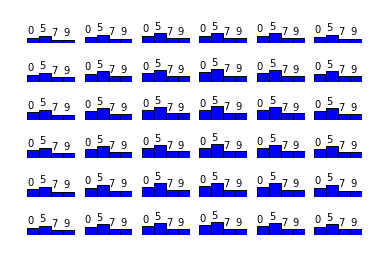

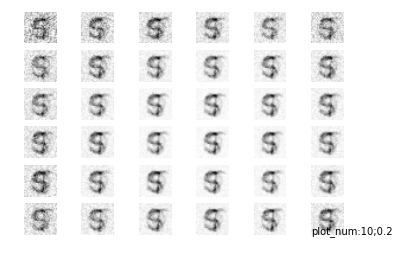

Check loss
  Duration so far:  0.0  min et  11.267638683319092  secondes.


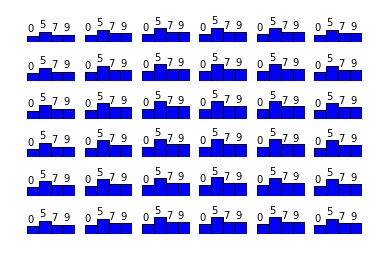

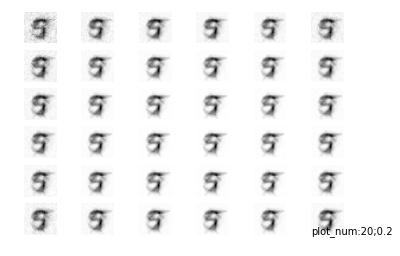

Check loss
  Duration so far:  0.0  min et  22.564465284347534  secondes.


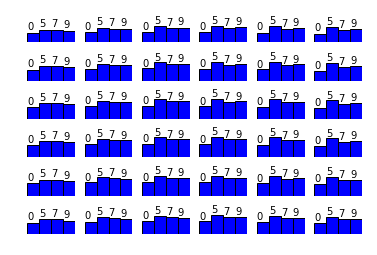

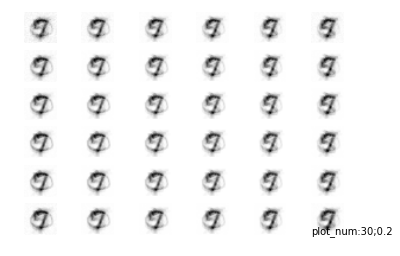

Check loss
  Duration so far:  0.0  min et  33.67511200904846  secondes.


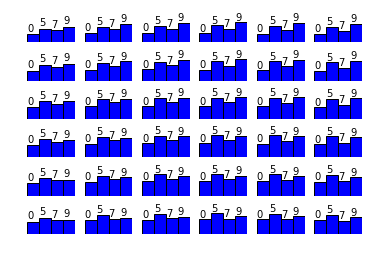

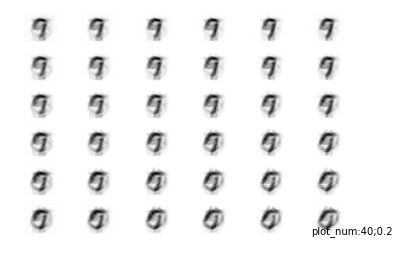

Check loss
  Duration so far:  0.0  min et  45.05162477493286  secondes.


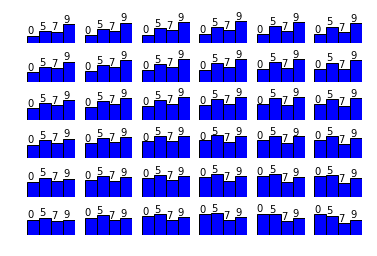

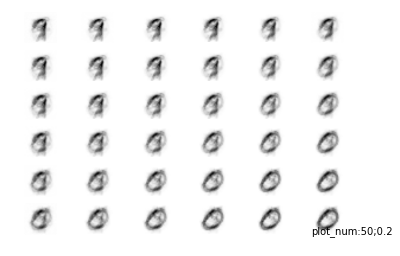

Check loss
  Duration so far:  0.0  min et  56.55958914756775  secondes.


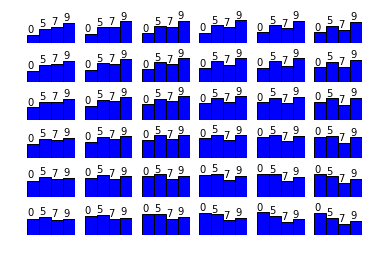

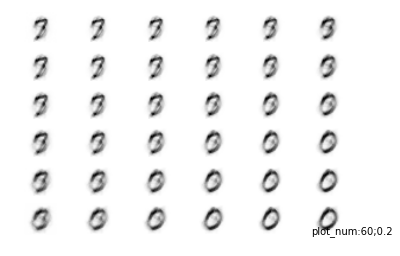

Check loss
  Duration so far:  1.0  min et  7.716766357421875  secondes.


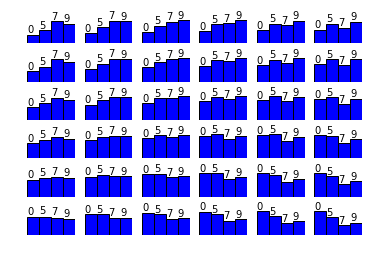

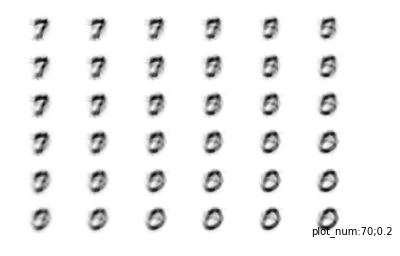

Check loss
  Duration so far:  1.0  min et  18.648308992385864  secondes.


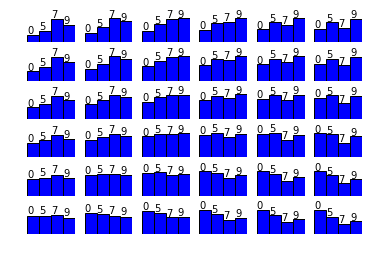

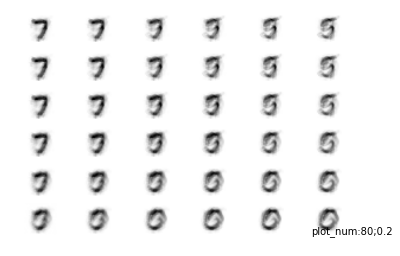

Check loss
  Duration so far:  1.0  min et  29.723196983337402  secondes.


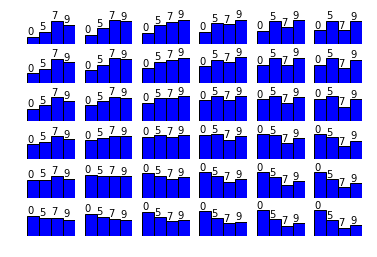

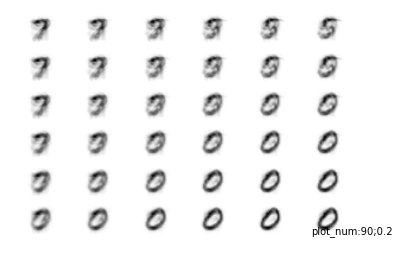

Check loss
  Duration so far:  1.0  min et  41.94667363166809  secondes.


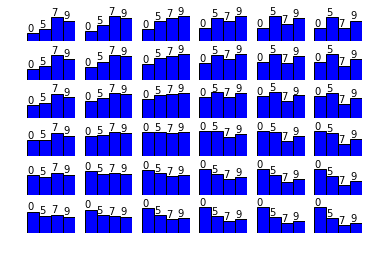

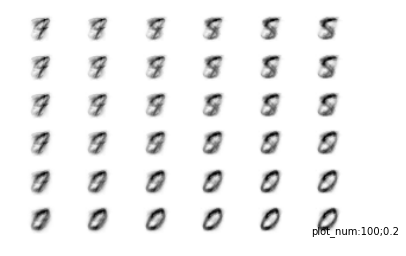

Check loss
  Duration so far:  1.0  min et  55.07381343841553  secondes.


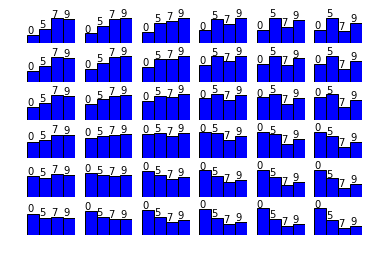

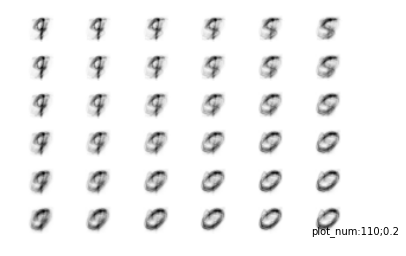

Check loss
  Duration so far:  2.0  min et  6.580113410949707  secondes.


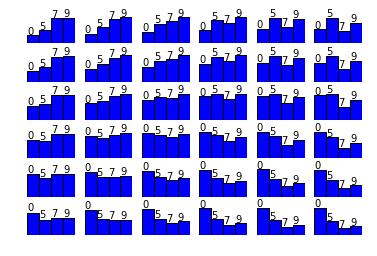

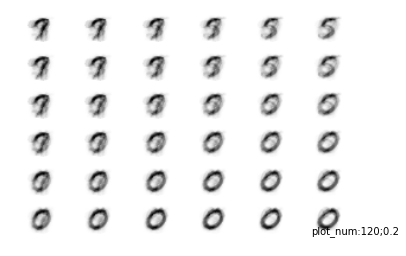

Check loss
  Duration so far:  2.0  min et  17.71403169631958  secondes.


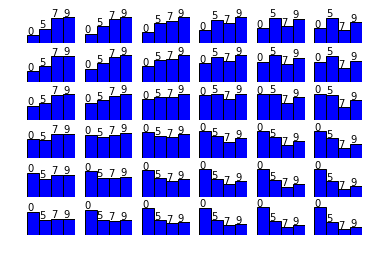

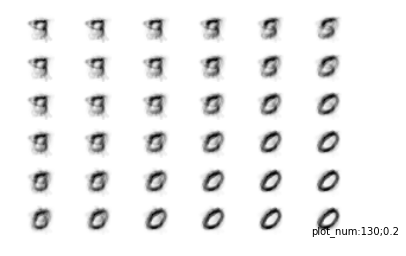

Check loss
  Duration so far:  2.0  min et  28.732454538345337  secondes.


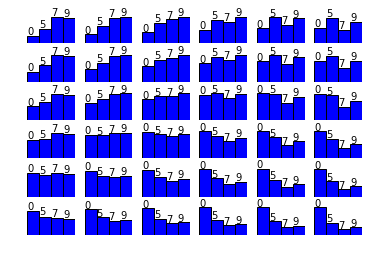

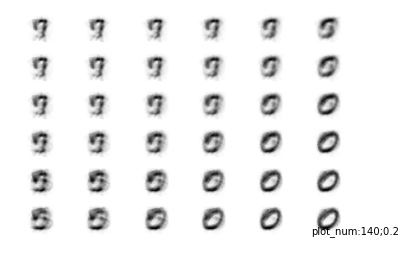

Check loss
  Duration so far:  2.0  min et  39.56030082702637  secondes.


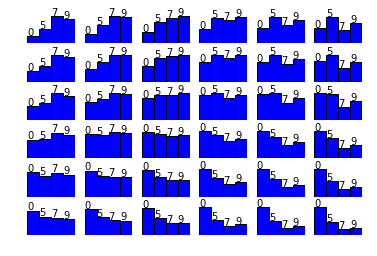

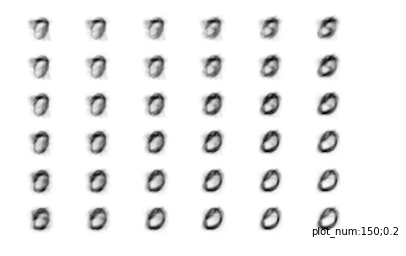

Check loss
  Duration so far:  2.0  min et  51.33142304420471  secondes.


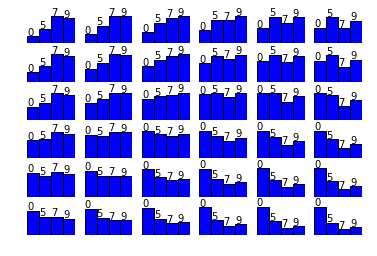

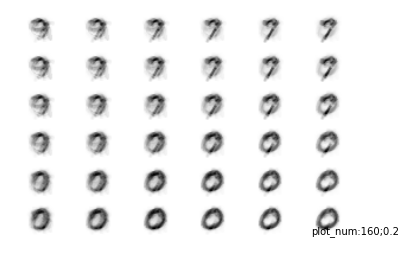

Check loss
  Duration so far:  3.0  min et  3.2695796489715576  secondes.


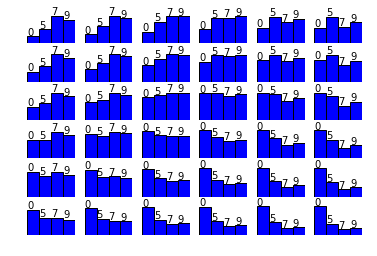

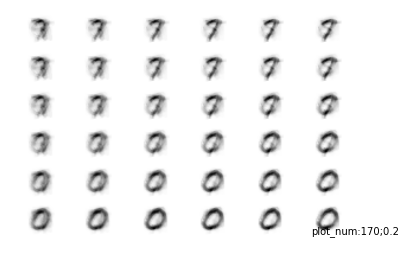

Check loss
  Duration so far:  3.0  min et  15.27454948425293  secondes.


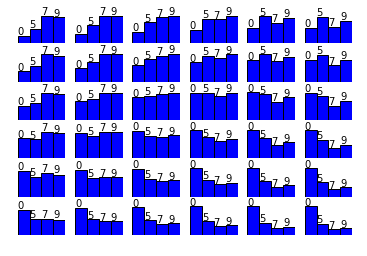

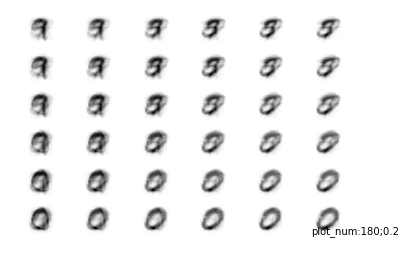

Check loss
  Duration so far:  3.0  min et  27.00245976448059  secondes.


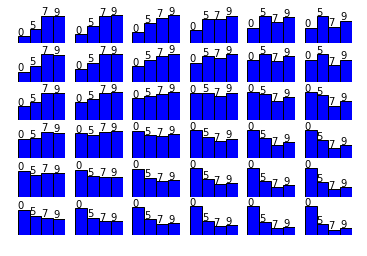

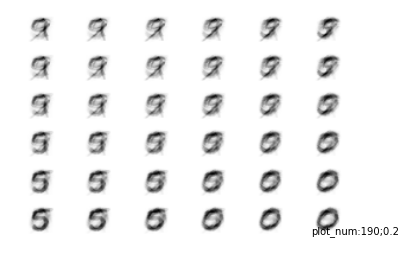

Check loss
  Duration so far:  3.0  min et  38.09735059738159  secondes.


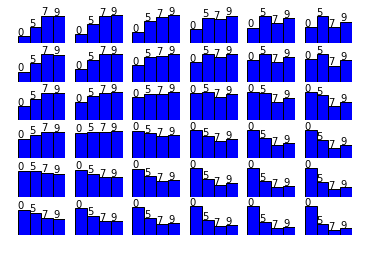

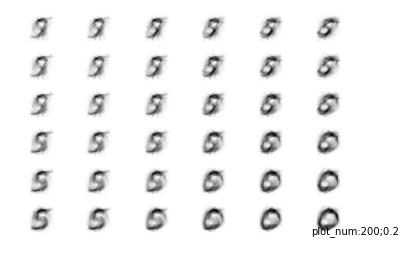

Check loss
  Duration so far:  3.0  min et  49.02391266822815  secondes.


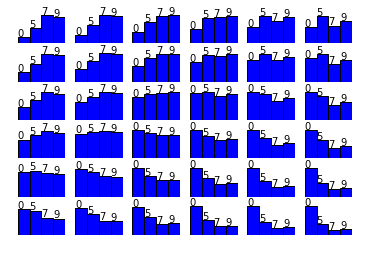

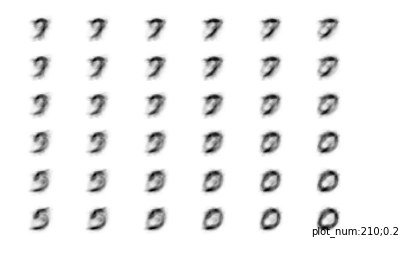

Check loss
  Duration so far:  4.0  min et  0.5633347034454346  secondes.


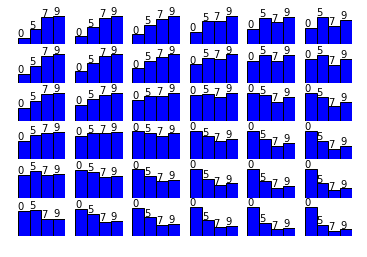

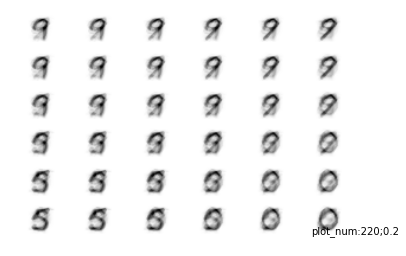

Check loss
  Duration so far:  4.0  min et  12.04293704032898  secondes.


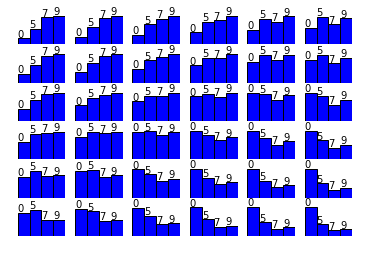

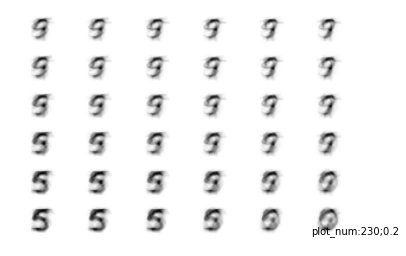

Check loss
  Duration so far:  4.0  min et  23.40022039413452  secondes.


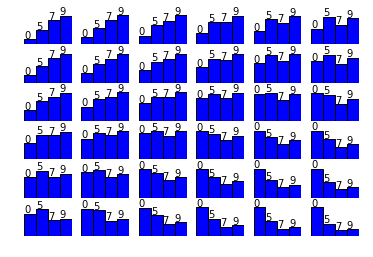

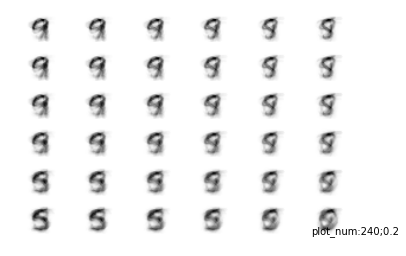

Check loss
  Duration so far:  4.0  min et  34.509734869003296  secondes.


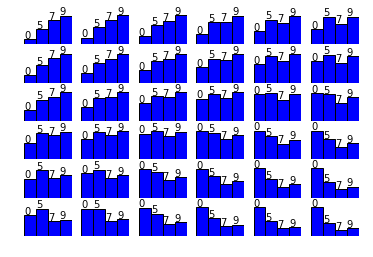

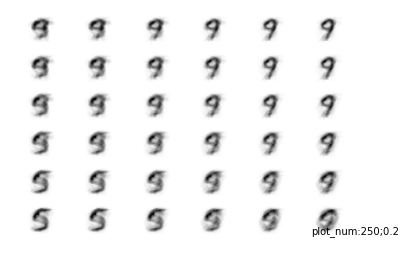

Check loss
  Duration so far:  4.0  min et  45.66386342048645  secondes.


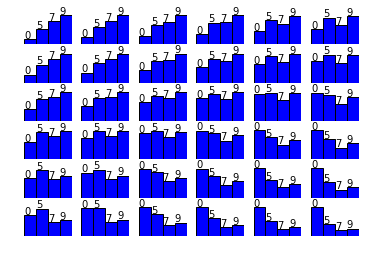

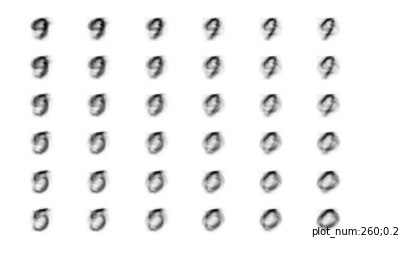

Check loss
  Duration so far:  4.0  min et  56.612937927246094  secondes.


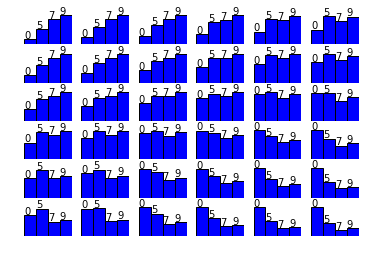

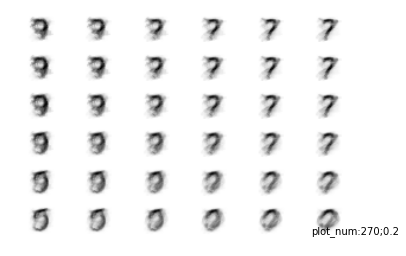

Check loss
  Duration so far:  5.0  min et  7.2417309284210205  secondes.


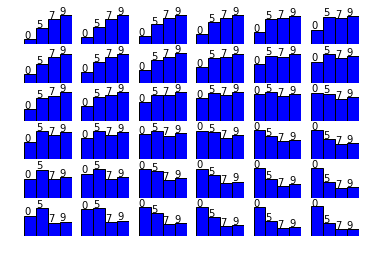

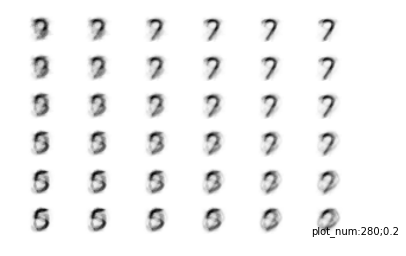

Check loss
  Duration so far:  5.0  min et  18.363813877105713  secondes.


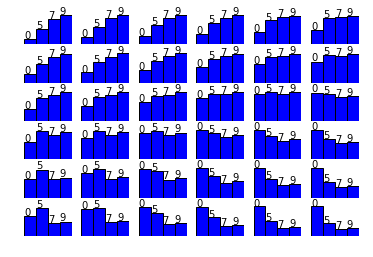

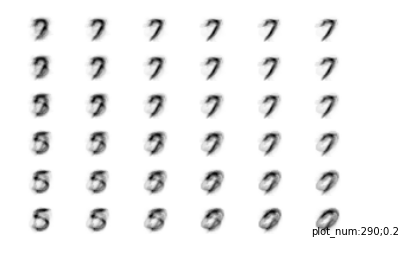

Check loss
  Duration so far:  5.0  min et  29.315815448760986  secondes.


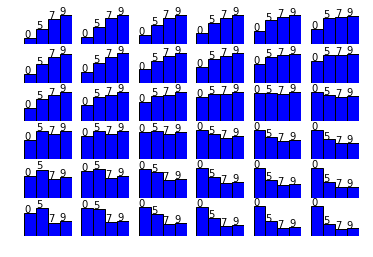

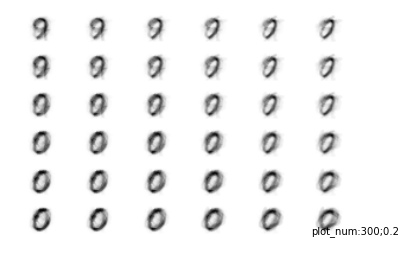

Check loss
  Duration so far:  5.0  min et  40.53011345863342  secondes.


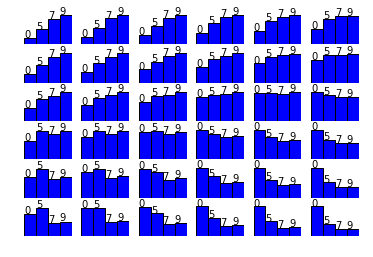

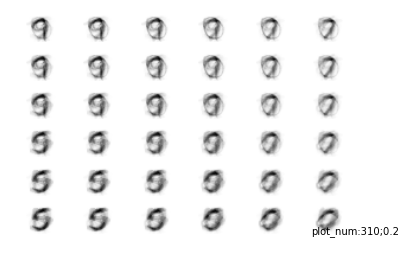

Check loss
  Duration so far:  5.0  min et  51.542091846466064  secondes.


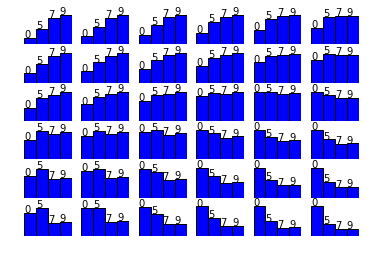

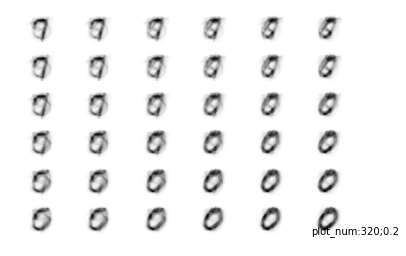

Check loss
  Duration so far:  6.0  min et  2.3834993839263916  secondes.


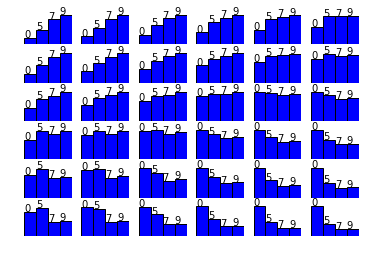

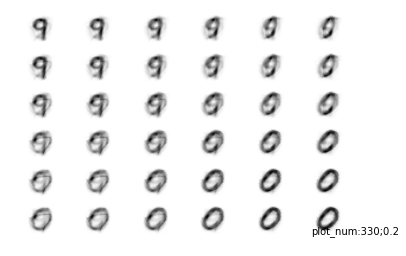

Check loss
  Duration so far:  6.0  min et  13.346639633178711  secondes.


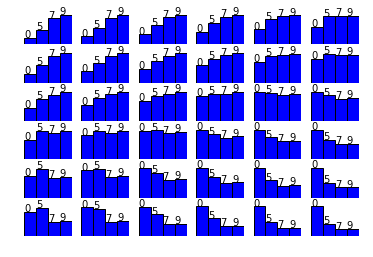

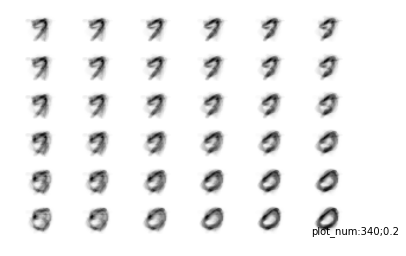

Check loss
  Duration so far:  6.0  min et  24.755807161331177  secondes.


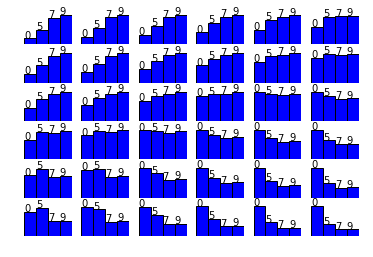

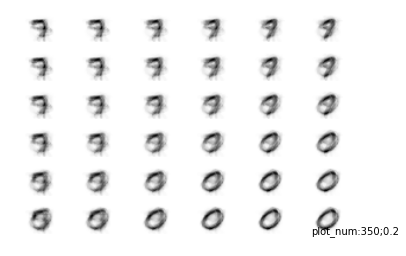

Check loss
  Duration so far:  6.0  min et  35.76897692680359  secondes.


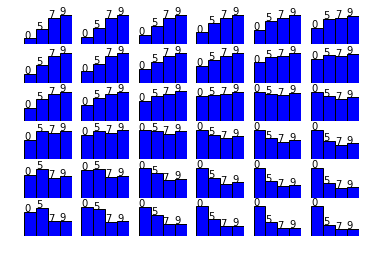

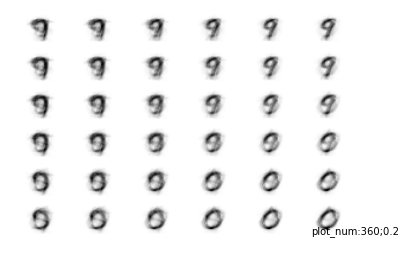

Check loss
  Duration so far:  6.0  min et  46.66547203063965  secondes.


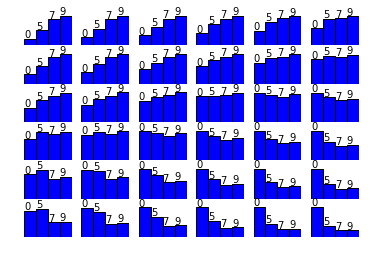

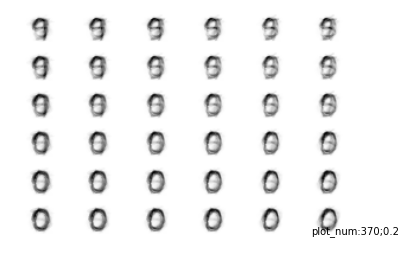

Check loss
  Duration so far:  6.0  min et  58.085256814956665  secondes.


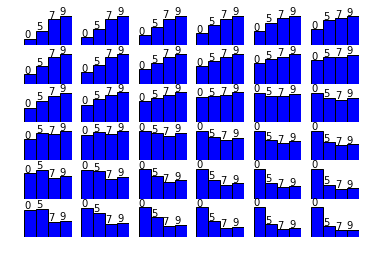

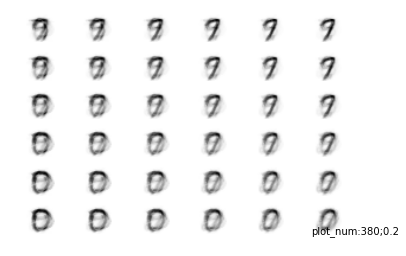

Check loss
  Duration so far:  7.0  min et  10.2268967628479  secondes.


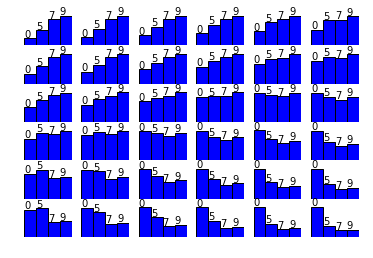

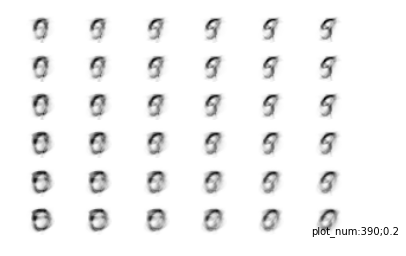

Check loss
  Duration so far:  7.0  min et  21.758132934570312  secondes.


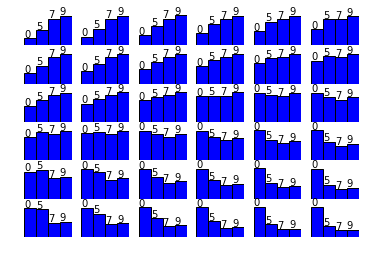

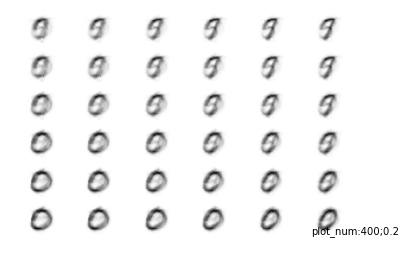

Check loss
  Duration so far:  7.0  min et  33.60369610786438  secondes.


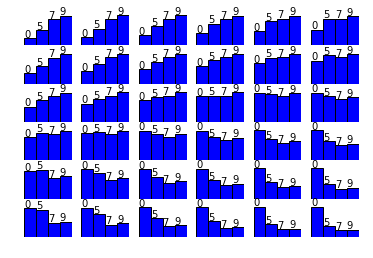

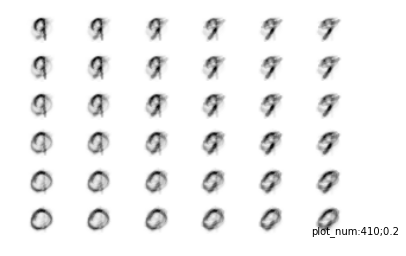

Convergence occured.
Total Duration :  7.0  min et  44.46549701690674  secondes.


In [137]:
def visualize_neurons(path,centers,eta,ite_num):
    plb.close('all')
    plb.figure(ite_num)
    for i in range(0,size_k**2):
        plb.subplot(size_k,size_k,i+1)
        plb.imshow(np.reshape(centers[i,:], [28, 28]),cmap='Greys',interpolation='bilinear')
        plb.axis('off')
    plb.annotate("plot_num:"+str(ite_num)+";"+str(eta),xy=(0,27))
    plb.savefig((str(path)+"/plot_"+"_sigma"+str(sigma)+"_eta"+str(eta)+"_num"+str(ite_num)+".png"))
    plb.close(i)
    plb.show()
    plb.draw()
    
def get_attribute_visualize_label(centers_label):
    plb.plot(centers_label)
    
def visualize_label(path,centers_label,eta,ite_num):
    plb.close('all')
    plb.figure(ite_num)
    for i in range(0,size_k**2):
        labe = centers_label[i,:]
        lab = [value for value in labe if value != 0]
        
        plb.subplot(size_k,size_k,i+1)
        plb.axis([0,4,0,max(lab)+1])
        plb.axis('off')
        plb.bar([0,1,2,3],lab,1.0)
        for k in range(0,np.shape(targetdigits)[0]):
            plb.annotate(targetdigits[k],xy=(k,lab[k]+0.2))
            #if(targetdigits[k]==max(targetdigits)):
                #plb.annotate("WINNER",xy=(i,lab[k]+0.6))    
    plb.savefig((str(path)+"/labels_"+"_sigma"+str(sigma)+"_eta"+str(eta)+"_num"+str(ite_num)+".png"))
    plb.show()
    plb.plot()
    
    
def som_step_labels(centers,centers_label,data,label,neighbor,eta,sigma):
    """Performs one step of the sequential learning for a 
    self-organized map (SOM).
    
      centers = som_step(centers,data,neighbor,eta,sigma)
    
      Input and output arguments: 
       centers  (matrix) cluster centres. Have to be in format:
                         center X dimension
       data     (vector) the actually presented datapoint to be presented in
                         this timestep
       neighbor (matrix) the coordinates of the centers in the desired
                         neighborhood.
       eta      (scalar) a learning rate
       sigma    (scalar) the width of the gaussian neighborhood function.
                         Effectively describing the width of the neighborhood
    """
    
    size_k = int(np.sqrt(len(centers)))
    new_centers = np.copy(centers)
    new_centers_label = np.copy(centers_label)
    #find the best matching unit via the minimal distance to the datapoint
    b = np.argmin(np.sum(np.abs(centers - np.resize(data,(size_k**2,data.size))),1))
    #b = np.argmin(np.sum((centers - np.resize(data, (size_k**2, data.size)))**2,1))
    # find coordinates of the winner
    a,b = np.nonzero(neighbor == b)
    # update all units
    for j in range(size_k**2):
        # find coordinates of this unit
        a1,b1 = np.nonzero(neighbor==j)
        # calculate the distance and discounting factor
        disc=gauss(np.sqrt((a-a1)**2+(b-b1)**2),[0, sigma])
        # update weights        
        new_centers[j,:] += disc * eta * (data - centers[j,:])
        new_centers_label[j,label] += disc * eta
    return new_centers, new_centers_label

def kohonen_label(data,labels,ite_content):
    time_s = time.time()

    """Example for using create_data, plot_data and som_step.
    """
    
    losses = []
    for a in range(0,np.shape(ite_content)[0]):    
        #initialise the centers randomly
        centers = np.random.rand(size_k**2, dim) * data_range
        centers_label = np.zeros((size_k**2, 10))
        #build a neighborhood matrix
        neighbor = np.arange(size_k**2).reshape((size_k, size_k))
        #set the random order in which the datapoints should be presented
        i_random = np.arange(tmax) % dy
        np.random.shuffle(i_random)
        print("Iteration number is",a,".")
        for t, i in enumerate(i_random):
            centers,centers_label = som_step_labels(centers, centers_label, data[i,:],labels[i],neighbor,eta,sigma)
            if(t%10==0 and t>1):
                print("Check loss")
                time_f = time.time()
                print("  Duration so far: ",((time_f-time_s)-(time_f-time_s)%60)/60," min et ",(time_f-time_s)%60," secondes.")
                losses.append(reconstruction_error(centers,data))
                visualize_label("plots/temp",centers_label,eta,t)
                visualize_neurons("plots/temp",centers,eta,t)
                if(np.shape(losses)[0]>40):
                    p1,p2,result = (check_conv(losses,convergence_factor,20))
                    result = 1
                    if(result):
                        print("Convergence occured.")
                        break;
        time_f = time.time()
        print("Total Duration : ",((time_f-time_s)-(time_f-time_s)%60)/60," min et ",(time_f-time_s)%60," secondes.")
        return losses

ite_content = [0]
losses = kohonen_label(data,labels,ite_content)

In [9]:
def check_conv(losses, conv_fact,nbrValues):
    assert(np.shape(losses)[0]>=nbrValues*2)
    part1 = losses[np.shape(losses)[0]-nbrValues:np.shape(losses)[0]]
    part2 = losses[np.shape(losses)[0]-nbrValues*2:np.shape(losses)[0]-nbrValues]
    p1 = sum(part1)/nbrValues
    p2 = sum(part2)/nbrValues
    return p1, p2, p1/p2>conv_fact

def print_state(loss,t,i,c,run):
    print("   PRINTING STATE: loss is ",loss,". (t,i) is (",t,",",i,"). c is",c," run is",run)

def kohonen_conv(data,labels,learning_rate,convergence_factor):
    time_s = time.time()
    """Example for using create_data, plot_data and som_step.
    """
    plb.close('all')
    
    losses = []   
    #initialise the centers randomly
    centers = np.random.rand(size_k**2, dim) * data_range
    #build a neighborhood matrix
    neighbor = np.arange(size_k**2).reshape((size_k, size_k))
    #set the random order in which the datapoints should be presented
    i_random = np.arange(tmax) % dy
    np.random.shuffle(i_random)
    plb.figure
    run = 1
    c = 0
    while(run):
        c = c+1
        time_f = time.time()
        print("Going for a run!")
        print("   Duration so far: ",((time_f-time_s)-(time_f-time_s)%60)/60," min et ",(time_f-time_s)%60," secondes.")
        for t, i in enumerate(i_random):
            centers = som_step(centers, data[i,:],neighbor,learning_rate,sigma)
            loss = reconstruction_error(centers,data)
            losses.append(loss)
            if(t%50==0):
                print_state(loss,t,i,c,run)
            if(t>200):
                p1, p2, result = check_conv(losses,convergence_factor,100)
                if(t%100==0 and t>1):                    
                    print("   Checking convergence!")
                    print("   p1 is:",p1)
                    print("   p2 is:",p2)
                    print("   So result is",p1/p2,"<>",convergence_factor)
                if(result):
                    run = 0;
                    break;                    
                
    time_f = time.time()
    print("Total Duration : ",((time_f-time_s)-(time_f-time_s)%60)/60," min et ",(time_f-time_s)%60," secondes.")
    return losses, c,t

losses2,big_loop,small_loop =kohonen_conv(data,labels,0.2,0.99)

Going for a run!
   Duration so far:  0.0  min et  0.0009999275207519531  secondes.
   PRINTING STATE: loss is  6656908.20747 . (t,i) is ( 0 , 1373 ). c is 1  run is 1
   PRINTING STATE: loss is  3593849.31684 . (t,i) is ( 50 , 137 ). c is 1  run is 1
   PRINTING STATE: loss is  3366299.02093 . (t,i) is ( 100 , 385 ). c is 1  run is 1
   PRINTING STATE: loss is  3397366.15766 . (t,i) is ( 150 , 377 ). c is 1  run is 1
   PRINTING STATE: loss is  3330947.76304 . (t,i) is ( 200 , 530 ). c is 1  run is 1
   PRINTING STATE: loss is  3329488.29586 . (t,i) is ( 250 , 368 ). c is 1  run is 1
   PRINTING STATE: loss is  3309552.26587 . (t,i) is ( 300 , 667 ). c is 1  run is 1
   Checking convergence!
   p1 is: 3304107.0788
   p2 is: 3372140.37523
   So result is 0.97982489195 <> 0.99
   PRINTING STATE: loss is  3235337.00747 . (t,i) is ( 350 , 555 ). c is 1  run is 1
   PRINTING STATE: loss is  3243032.72018 . (t,i) is ( 400 , 1528 ). c is 1  run is 1
   Checking convergence!
   p1 is: 3252568

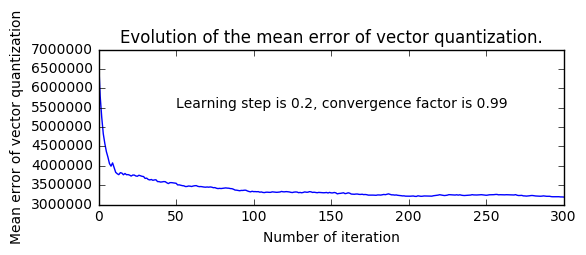

In [99]:
#Visualize error evolution:
def visualize_error(losses_, param):
    learning_rate = param[0]
    conv = param[1]
    plb.figure(figsize=(6,2))   
    plb.title("Evolution of the mean error of vector quantization.")
    plb.annotate(("Learning step is "+str(learning_rate)+", convergence factor is "+str(conv)),xy=(50,5500000))
    plb.ylabel("Mean error of vector quantization")
    plb.xlabel("Number of iteration")
    i_s = np.arange(np.shape(losses_)[0])#np.arange(learning_rates[i])
    plb.plot(i_s,losses_)
    plb.savefig("plots_report/Graph_new_error_evloution_lr"+str(learning_rate)+".jpg")
        
param = [0.2,0.99]
visualize_error(losses2,param)

Ploting result with : 4000 iteration, i.e. 2 times 2000


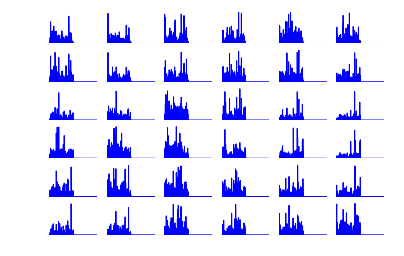

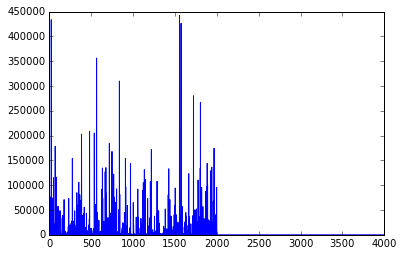

In [88]:
a = 0
print("Ploting result with :",ite_nums[a]*tmax,"iteration, i.e.",ite_nums[a],"times",tmax)
i_s = np.arange(0,tmax*ite_nums[a])
for i in range(0,size_k**2):
    plb.subplot(size_k,size_k,i+1)
    plb.plot(i_s,losses[:,i])
    plb.axis('off')

plb.figure()
plb.plot(i_s,losses[:,i])

In [80]:


print(losses[1985:2010,8])
print(losses[2000,:])

[  2.23410177e+01   4.82702370e+02   9.13795321e+03   3.46389943e-02
   3.32062223e+00   3.80914531e+03   1.37348929e+01   2.87779792e+03
   4.78304129e+00   3.78530923e+01   3.63339018e+00   1.39167624e+01
   5.51086351e+04   4.44736806e+01   3.58903267e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
